In [28]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
import statsmodels.api as sm


In [3]:
cloud05=xr.open_dataset('../data/results/xu/result.nc')
cloud=xr.open_dataset('../data/results/potential_1deg_noelemask.nc')
msg14=xr.open_dataset('../data/results/msg_potential_1400.nc')
cloudxu=xr.open_dataset('../data/results/xu/potential_one_deg.nc')

In [95]:
cloud05.potential.where(cloud05.potential<0).mean()

<xarray.DataArray 'potential' ()>
array(-0.01698088)

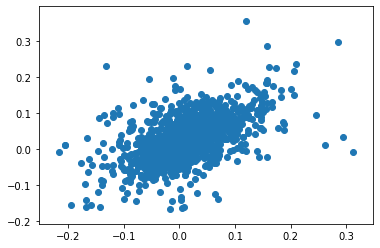

In [19]:
plt.scatter(cloudxu.potential_ele_std .values.flatten(), cloud.potential.values.flatten())

In [6]:
flux_h=pd.read_csv('../data/H_diff.csv')
flux_h.loc[:,'lat_mean']=flux_h.loc[:,['pair_open_lat','pair_forest_lat']].mean(axis=1)
flux_h.loc[:,'lon_mean']=flux_h.loc[:,['pair_open_lon','pair_forest_lon']].mean(axis=1)

In [7]:
# Add continent mark
ind=(flux_h['lon_mean']>-130) & (flux_h['lon_mean']<-60)&(flux_h['lat_mean']>0) & (flux_h['lat_mean']<65)
flux_h.loc[ind,'region']='NA'
ind=(flux_h['lon_mean']>0) & (flux_h['lon_mean']<60)&(flux_h['lat_mean']>30) & (flux_h['lat_mean']<70)
flux_h.loc[ind,'region']='EU'
flux_h.loc[14,'region']='AU'


In [8]:
h = xr.open_dataset('../data/results/diff_H.nc')

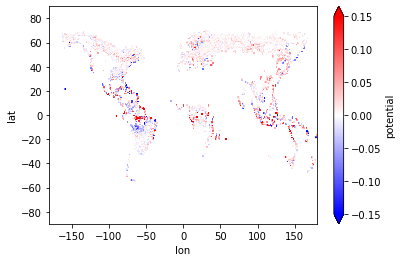

In [16]:
ds05.potential.plot(vmin=-0.15,vmax=0.15,cmap='bwr')

In [86]:
# Add site from Von 2004
flux_h.loc[28,['dif','lat_mean','lon_mean']]=[10.8,-10.2,-61.7666]

In [63]:
# temp = [h.diff_h.sel(lat=flux_h['lat_mean'][i], lon=flux_h['lon_mean'][i], method='nearest').values for i in range(29)]
# temp = [cloud.potential.sel(lat=flux_h['lat_mean'][i], lon=flux_h['lon_mean'][i], method='nearest').values for i in range(28)]
# temp = [cloudxu.potential_ele_std .sel(lat=flux_h['lat_mean'][i], lon=flux_h['lon_mean'][i], method='nearest').values for i in range(28)]

temp2 = [cloud05.potential.sel(lat=flux_h['lat_mean'][i], lon=flux_h['lon_mean'][i], method='nearest').values for i in range(28)]
# temp = [h_clm.SH.sel(lat=flux_h['lat_mean'][i], lon=flux_h['lon_mean'][i], method='nearest').values for i in range(28)]


In [65]:
# flux_h.loc[:,'cloud_diffxu_ele'] =np.array(temp)
# flux_h.loc[:,'cloud_diff'] =np.array(temp)
flux_h.loc[:,'cloud_diff05'] =np.array(temp2)

# flux_h.loc[:,'h_diff'] =np.array(temp)


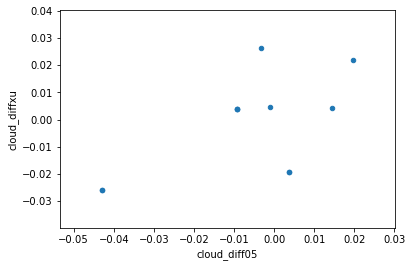

In [67]:
flux_h.plot.scatter(x='cloud_diff05',y='cloud_diffxu')
# plt.plot([-130,100],[0,0],'--')
# plt.plot([0,0],[-0.04,0.04],'--')

In [24]:
flux_h#.loc[flux_h['dif']>-150].corr()

,pair,dif,pair_open,pair_forest,pair_open_lat,pair_open_lon,pair_forest_lat,pair_forest_lon,nonforest_type,LE_dif,Rnet_dif,Swin_dif,lat_mean,lon_mean,region,cloud_diffxu,cloud_diff,cloud_diffxu_ele
0,1,25.066,FR-Gri,FR-Fon,48.8442,1.9519,48.4764,2.7801,Cropland,-85.044380,-75.252,-7.396409,48.66030,2.36600,EU,-0.007940,-0.011644,-0.007940
1,2,-85.293,NL-Hor,NL-Loo,52.2404,5.0713,52.1666,5.7436,Grassland,16.783250,-75.214,9.313430,52.20350,5.40745,EU,0.021957,0.034324,0.021957
2,3,-115.405,DE-Gri,DE-Tha,50.9495,13.5125,50.9636,13.5669,Grassland,1.806797,-59.483,-17.540870,50.95655,13.53970,EU,0.013356,0.015722,0.009803
3,4,-68.353,DE-Kli,DE-Tha,50.8929,13.5225,50.9636,13.5669,Grassland,-18.252470,-52.372,-0.685159,50.92825,13.54470,EU,0.013356,0.015722,0.009803
4,5,-48.799,CA-NS6,CA-NS2,55.9167,-98.9644,55.9058,-98.5247,Open Shrubland,-18.315220,2.955,38.989400,55.91125,-98.74455,NA,0.006582,0.003751,0.006582
5,6,-1.866,CA-NS6,CA-NS5,55.9167,-98.9644,55.8631,-98.4850,Open Shrubland,-34.412550,-1.213,20.698910,55.88990,-98.72470,NA,0.006582,0.003751,0.006582
6,7,-64.375,CA-NS6,CA-NS1,55.9167,-98.9644,55.8792,-98.4839,Open Shrubland,-24.015370,-26.907,6.878147,55.89795,-98.72415,NA,0.006582,0.003751,0.006582
7,8,-44.843,CA-NS6,CA-NS3,55.9167,-98.9644,55.9117,-98.3822,Open Shrubland,-26.697780,-11.374,13.957630,55.91420,-98.67330,NA,0.006582,0.003751,0.006582
8,9,-13.790,CA-SF3,CA-SF1,54.0916,-106.0053,54.4850,-105.8176,Open Shrubland,-35.588090,-11.600,-0.381285,54.28830,-105.91145,NA,-0.025982,-0.009898,-0.025982
9,10,-1.184,CA-SF3,CA-SF2,54.0916,-106.0053,54.2539,-105.8775,Open Shrubland,-39.737710,-12.086,-25.939640,54.17275,-105.94140,NA,-0.025982,-0.009898,-0.025982


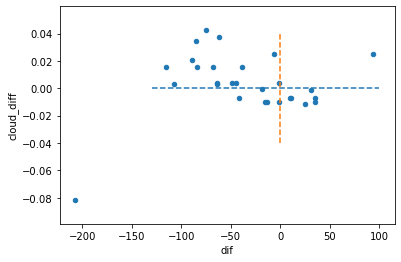

In [16]:
flux_h.plot.scatter(x='dif',y='cloud_diff')
plt.plot([-130,100],[0,0],'--')
plt.plot([0,0],[-0.04,0.04],'--')

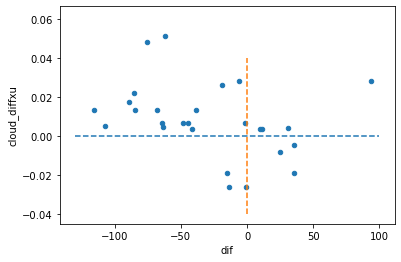

In [68]:
flux_h[flux_h['dif']>-150].plot.scatter(x='dif',y='cloud_diffxu')
plt.plot([-130,100],[0,0],'--')
plt.plot([0,0],[-0.04,0.04],'--')

In [92]:
flux_h #.plot.scatter(x='dif',y='cloud_diff')


,pair,dif,pair_open,pair_forest,pair_open_lat,pair_open_lon,pair_forest_lat,pair_forest_lon,lat_mean,lon_mean,cloud_diff
0,1.0,25.066,FR-Gri,FR-Fon,48.8442,1.9519,48.4764,2.7801,48.66030,2.36600,-0.011644
1,2.0,-85.293,NL-Hor,NL-Loo,52.2404,5.0713,52.1666,5.7436,52.20350,5.40745,0.034324
2,3.0,-115.405,DE-Gri,DE-Tha,50.9495,13.5125,50.9636,13.5669,50.95655,13.53970,0.015722
3,4.0,-68.353,DE-Kli,DE-Tha,50.8929,13.5225,50.9636,13.5669,50.92825,13.54470,0.015722
4,5.0,-48.799,CA-NS6,CA-NS2,55.9167,-98.9644,55.9058,-98.5247,55.91125,-98.74455,0.003751
5,6.0,-1.866,CA-NS6,CA-NS5,55.9167,-98.9644,55.8631,-98.4850,55.88990,-98.72470,0.003751
6,7.0,-64.375,CA-NS6,CA-NS1,55.9167,-98.9644,55.8792,-98.4839,55.89795,-98.72415,0.003751
7,8.0,-44.843,CA-NS6,CA-NS3,55.9167,-98.9644,55.9117,-98.3822,55.91420,-98.67330,0.003751
8,9.0,-13.790,CA-SF3,CA-SF1,54.0916,-106.0053,54.4850,-105.8176,54.28830,-105.91145,-0.009898
9,10.0,-1.184,CA-SF3,CA-SF2,54.0916,-106.0053,54.2539,-105.8775,54.17275,-105.94140,-0.009898


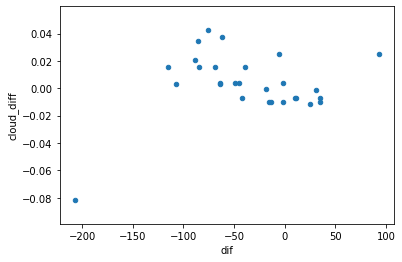

In [83]:
flux_h.plot.scatter(x='dif',y='cloud_diff')


In [44]:
flux_h[flux_h['dif']>-150].corr()

,pair,dif,pair_open_lat,pair_open_lon,pair_forest_lat,pair_forest_lon,LE_dif,Rnet_dif,Swin_dif,lat_mean,lon_mean,cloud_diffxu,cloud_diff,cloud_diffxu_ele
pair,1.000000,0.178382,-0.303990,-0.027696,-0.304646,-0.030431,-0.135180,-0.268680,-0.080364,-0.304323,-0.029063,0.200353,0.077892,-0.104808
dif,0.178382,1.000000,0.054410,-0.331986,0.058531,-0.332187,-0.631028,-0.173661,0.101227,0.056471,-0.332087,-0.314679,-0.425145,-0.475431
pair_open_lat,-0.303990,0.054410,1.000000,-0.493737,0.999933,-0.491639,0.150837,0.359543,0.152139,0.999983,-0.492690,-0.147514,-0.151479,0.116698
pair_open_lon,-0.027696,-0.331986,-0.493737,1.000000,-0.497961,0.999986,0.192232,-0.142850,0.139382,-0.495857,0.999996,0.362265,0.504251,0.311140
pair_forest_lat,-0.304646,0.058531,0.999933,-0.497961,1.000000,-0.495873,0.144313,0.356597,0.148930,0.999983,-0.496920,-0.151270,-0.154328,0.108801
pair_forest_lon,-0.030431,-0.332187,-0.491639,0.999986,-0.495873,1.000000,0.192438,-0.141936,0.140481,-0.493764,0.999996,0.361974,0.504097,0.312143
LE_dif,-0.135180,-0.631028,0.150837,0.192232,0.144313,0.192438,1.000000,0.566227,0.278870,0.147578,0.192336,0.144453,0.228590,0.343223
Rnet_dif,-0.268680,-0.173661,0.359543,-0.142850,0.356597,-0.141936,0.566227,1.000000,0.589676,0.358076,-0.142394,-0.164228,-0.058728,-0.169540
Swin_dif,-0.080364,0.101227,0.152139,0.139382,0.148930,0.140481,0.278870,0.589676,1.000000,0.150537,0.139932,0.144879,0.216346,0.147548
lat_mean,-0.304323,0.056471,0.999983,-0.495857,0.999983,-0.493764,0.147578,0.358076,0.150537,1.000000,-0.494813,-0.149395,-0.152906,0.112762


In [53]:
flux_h.to_csv('../data/flux_pair_my.csv',index=False)

# Satellite and Clm sensible heat diff

In [41]:
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib as mpl

import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
from matplotlib.colors import ListedColormap

def get_myjet_cmap():
    mycmap=np.genfromtxt('../data/jet_blue_red_colormap.csv',delimiter=',')
    return ListedColormap(mycmap)
mycmap=get_myjet_cmap()

In [69]:
h_sa=xr.open_dataset('../data/results/xu/HG_det.nc')
h_clm=xr.open_dataset('../data/results/xu/CLM_SH.nc')


In [84]:
import numpy.ma as ma


In [86]:
# ma.corrcoef(ma.masked_invalid(h_sa.HG_det.values.flatten()), ma.masked_invalid(cloudxu.potential.values.flatten()))

ma.corrcoef(ma.masked_invalid(h_sa.HG_det.values.flatten()), ma.masked_invalid(cloudxu.potential_ele_std.values.flatten()))

masked_array(
  data=[[1.0, -0.09287160669831351],
        [-0.09287160669831351, 1.0]],
  mask=[[False, False],
        [False, False]],
  fill_value=1e+20)

In [81]:
flux_h.transpose()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
pair,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
dif,25.066,-85.293,-115.405,-68.353,-48.799,-1.866,-64.375,-44.843,-13.79,-1.184,...,-75.42,35.421,31.219,-207.365,-38.864,-84.378,35.311,-15.243,-18.62,-61.854
pair_open,FR-Gri,NL-Hor,DE-Gri,DE-Kli,CA-NS6,CA-NS6,CA-NS6,CA-NS6,CA-SF3,CA-SF3,...,CZ-BK2,US-Var,IT-CA2,AT-Neu,DE-Kli,DE-Gri,US-Dk1,US-Dk1,US-NC1,US-Fwf
pair_forest,FR-Fon,NL-Loo,DE-Tha,DE-Tha,CA-NS2,CA-NS5,CA-NS1,CA-NS3,CA-SF1,CA-SF2,...,CZ-BK1,US-Blo,IT-Ro2,IT-Ren,DE-Obe,DE-Obe,US-Dk2,US-Dk3,US-NC2,US-Fmf
pair_open_lat,48.8442,52.2404,50.9495,50.8929,55.9167,55.9167,55.9167,55.9167,54.0916,54.0916,...,49.4944,38.4133,42.3772,47.1167,50.8929,50.9495,35.9712,35.9712,35.8118,35.4435
pair_open_lon,1.9519,5.0713,13.5125,13.5225,-98.9644,-98.9644,-98.9644,-98.9644,-106.005,-106.005,...,18.5429,-120.951,12.026,11.3175,13.5225,13.5125,-79.0934,-79.0934,-76.7119,-111.772
pair_forest_lat,48.4764,52.1666,50.9636,50.9636,55.9058,55.8631,55.8792,55.9117,54.485,54.2539,...,49.5021,38.8953,42.3903,46.5869,50.7836,50.7836,35.9736,35.9782,35.803,35.1426
pair_forest_lon,2.7801,5.7436,13.5669,13.5669,-98.5247,-98.485,-98.4839,-98.3822,-105.818,-105.877,...,18.5369,-120.633,11.9209,11.4337,13.7196,13.7196,-79.1004,-79.0942,-76.6685,-111.727
nonforest_type,Cropland,Grassland,Grassland,Grassland,Open Shrubland,Open Shrubland,Open Shrubland,Open Shrubland,Open Shrubland,Open Shrubland,...,Grassland,Grassland,Cropland,Grassland,Cropland,Grassland,Grassland,Grassland,Open Shrubland,Grassland
LE_dif,-85.0444,16.7832,1.8068,-18.2525,-18.3152,-34.4126,-24.0154,-26.6978,-35.5881,-39.7377,...,-21.4571,-235.374,-85.7243,-44.5168,-25.0484,14.0609,-32.2152,-45.5075,-33.9395,-16.002


In [685]:
# Add ellipse to indicate key region
def add_circle(ax):
    # Amazon
    e1 = Ellipse(xy=(-60, -15),
                    width=50, height=25,
                    angle=25, edgecolor='k', facecolor='None',ls='--')
    # southeast USA
    e2 = Ellipse(xy=(-90, 35),
                    width=35, height=20,
                    angle=0, edgecolor='k', facecolor='None',ls='--')
    # Africa
    e3 = Ellipse(xy=(20, 0),
                    width=40, height=30,
                    angle=0, edgecolor='k', facecolor='None',ls='--')

    ax.add_artist(e1)
    ax.add_artist(e2)
    ax.add_artist(e3)

In [40]:
fig = plt.figure(figsize=[10,6])

# Cloud effect panel
pos1 = [0.05, 0.725, 0.5, 0.5] # [left, bottom, width, height]
ax1 = fig.add_axes(pos1, projection=ccrs.PlateCarree())
(-cloud05).potential.plot(cmap=mycmap, vmin=-0.15,vmax=0.15, ax=ax1, add_colorbar=False, rasterized=True) 
ax1.set_extent([-180, 180, -60, 80])
ax1.coastlines()
ax1.set_title('Potential cloud change')
ax1.text(0.015, 0.6, '$\Delta$Cloud', fontsize=12,transform=ax1.transAxes)
ax1.text(0.5, 0.05, 'MODIS', fontsize=12,transform=ax1.transAxes,ha='center',fontweight='bold')
add_circle(ax1)

# MSG Panel
pos1in = [0.035, 0.825, 0.15, 0.15] # [left, bottom, width, height]
ax1in = fig.add_axes(pos1in, projection=ccrs.PlateCarree())
(-msg14.potential).plot(cmap=mycmap, ax=ax1in, add_colorbar=False, rasterized=True)
ax1in.set_extent([-70, 60, -20, 45])
ax1in.coastlines()
ax1in.text(0.25, 0.05, 'MSG', fontsize=12,transform=ax1in.transAxes,fontweight='bold')
add_circle(ax1in)


# Add colorbar for cloud effect
cbar1_pos = [ax1.get_position().x0-0.02, ax1.get_position().y0, 0.01,ax1.get_position().height]
cax1 = fig.add_axes(cbar1_pos)
cb1 = mpl.colorbar.ColorbarBase(ax=cax1, cmap=mycmap, norm=Normalize(vmin=-0.15, vmax=0.15) ,
                                        orientation='vertical',ticks=np.arange(-0.15,0.16,0.05)) 
cb1.ax.set_yticklabels([-0.15,-0.1,-0.05 ,0, 0.05,0.10, 0.15], fontsize=9)
cax1.tick_params(axis="y",direction='out', left=True, labelleft=True, right=False, labelright=False, pad=0)
# cb1.set_label('$\Delta$Cloud', fontsize=10, labelpad=0)


## Satellite panel
pos2 = [0.05, 0.325, 0.5, 0.5] # [left, bottom, width, height]
ax2 = fig.add_axes(pos2, projection=ccrs.PlateCarree())
h_sa.HG_det.plot(cmap=mycmap,vmin=-50,vmax=50, ax=ax2, add_colorbar=False, rasterized=True) # tab10, set3

# ax2.set_position([ax2.get_position().x0-0.05, ax2.get_position().y0, ax1.get_position().width , ax1.get_position().height])

ax2.set_extent([-180, 180, -60, 80])
ax2.coastlines()
ax2.set_title('Potential sensible heat change')
ax2.text(0.025, 0.05, '$\Delta$(H+G)', fontsize=12,transform=ax2.transAxes)
ax2.text(0.5, 0.05, 'Satellite', fontsize=12,transform=ax2.transAxes ,ha='center',fontweight='bold')
add_circle(ax2)


# # Colorbar for satellite 
# cbar1_pos = [ax2.get_position().x1+0.002, ax2.get_position().y0, 0.01, ax1.get_position().height]
# cax1 = fig.add_axes(cbar1_pos)
# cb1 = mpl.colorbar.ColorbarBase(ax=cax1, cmap=mycmap, norm=Normalize(vmin=-50, vmax=50) ,
#                                         orientation='vertical', ticks=np.arange(-50,51,25))
# cb1.ax.set_yticklabels(np.arange(-50, 51,25),fontsize=9)
# # cax1.tick_params(labelright=False,labelleft=True)
# cax1.tick_params(axis="y",direction='out', left=False, right=True,pad=0)
# cb1.set_label('$\Delta$(H+G) (W/$m_2$)', fontsize=10,labelpad=0)

## CLM panel
pos3 = [0.05, 0.0, 0.5, 0.5] # [left, bottom, width, height]
ax3 = fig.add_axes(pos3, projection=ccrs.PlateCarree())
h_clm.SH.plot(cmap=mycmap,vmin=-50,vmax=50, ax=ax3, add_colorbar=False, rasterized=True) 
ax3.set_extent([-180, 180, -60, 80])
ax3.coastlines()
ax3.text(0.025, 0.05, '$\Delta$H', fontsize=12,transform=ax3.transAxes)
ax3.text(0.5, 0.05, 'CLM', fontsize=12,transform=ax3.transAxes, ha='center', fontweight='bold')
ax3.text(-0.05, 0.05, '$W/m^2$', fontsize=10,transform=ax3.transAxes, ha='center')
add_circle(ax3)

# Add colorbar for CLM
cbar3_pos = [ax3.get_position().x0-0.02,
                       ax3.get_position().y0+(ax3.get_position().height+ax2.get_position().height)*0.1,
                       0.01, 
                       (ax3.get_position().height+ax2.get_position().height)*0.8]
cax3 = fig.add_axes(cbar3_pos)
cb3 = mpl.colorbar.ColorbarBase(ax=cax3, cmap=mycmap, norm=Normalize(vmin=-50, vmax=50) ,
                                        orientation='vertical',ticks=np.arange(-50,51,10))
cb3.ax.set_yticklabels(np.arange(-50, 51,10), fontsize=9)
cax3.tick_params(axis="y",direction='out', left=True, labelleft=True, right=False, labelright=False, pad=0)

##  Flux location 1  panel: NA
pos4 = [0.6, 0.8, 0.25, 0.25] # [left, bottom, width, height]
ax4 = fig.add_axes(pos4,projection=ccrs.PlateCarree())
ind1=(flux_h['group_num']>1)
ind=(flux_h['lon_mean']>-130) & (flux_h['lon_mean']<-60)&(flux_h['lat_mean']>0) & (flux_h['lat_mean']<65)

# Plot connecting lines
for i in flux_h[ind1&ind].group.unique():
    ind0 = (flux_h.loc[:,'group']==i)
    ax4.plot([flux_h.loc[ind0,'lon_mean'],flux_h.loc[ind0,'lon_plotting']],[flux_h.loc[ind0,'lat_mean'],flux_h.loc[ind0,'lat_plotting']]
                     ,color='k',lw=0.5)

# Plot H at plotting lat/lon    
ax4.scatter(flux_h.loc[ind,'lon_plotting'], flux_h.loc[ind,'lat_plotting'], c=flux_h.loc[ind,'dif'], s=20,marker='o',cmap=mycmap,vmax=100, vmin=-100)
# plot cluster center location  
ax4.scatter(flux_h.loc[ind1,'lon_mean'], flux_h.loc[ind1,'lat_mean'], s=10, marker='.',color='k')
# ax4.set_extent([-130, -70, 20, 60])
ax4.set_extent([-125, -70, 30, 60])
ax4.coastlines()

ax4.add_feature(cfeature.LAND, facecolor=[0.88,0.88,0.88]) #, 'lightgrey'
# ax4.add_feature(cfeature.LAKES,edgecolor='black',facecolor='None') # Add lake
ax4.add_feature(cfeature.BORDERS, linestyle=':')
# ax4.set_title('North America')
ax4.text(0.05, 0.9, 'North America', fontsize=10,transform=ax4.transAxes)

ax4.text(0.5, 0.05, 'Paired flux site', fontsize=12, transform=ax4.transAxes, ha='center', fontweight='bold')
ax4.text(0.01, 0.035, '$\Delta$H', fontsize=12,transform=ax4.transAxes)
ax4.text(0.75, 1.075, 'Potential sensible heat change', fontsize=12, transform=ax4.transAxes, ha='center')


##  Flux location 2  panel: EU
pos5 = [0.8, 0.8, 0.25, 0.25] # [left, bottom, width, height]
ax5 = fig.add_axes(pos5,projection=ccrs.PlateCarree())
ind=(flux_h['lon_mean']>0) & (flux_h['lon_mean']<60)&(flux_h['lat_mean']>30) & (flux_h['lat_mean']<70)

# Plot connecting lines
for i in flux_h[ind1&ind].group.unique():
    ind0 = (flux_h.loc[:,'group']==i)
    ax5.plot([flux_h.loc[ind0,'lon_mean'],flux_h.loc[ind0,'lon_plotting']],[flux_h.loc[ind0,'lat_mean'],flux_h.loc[ind0,'lat_plotting']]
                     ,color='k',lw=0.5)

# Plot H at plotting lat/lon    
ax5.scatter(flux_h.loc[ind,'lon_plotting'], flux_h.loc[ind,'lat_plotting'], c=flux_h.loc[ind,'dif'], s=20,marker='o',cmap=mycmap,vmax=100, vmin=-100)
# plot cluster center location  
ax5.scatter(flux_h.loc[ind1,'lon_mean'], flux_h.loc[ind1,'lat_mean'], s=10, marker='.',color='k')
ax5.set_extent([0, 20, 40, 60])
ax5.coastlines()
# ax4.add_feature(cfeature.OCEAN)
ax5.add_feature(cfeature.LAND, facecolor=[0.88,0.88,0.88]) #, 'lightgrey'
ax5.add_feature(cfeature.BORDERS, linestyle=':')
# ax5.set_title('Europe')
ax5.text(0.025, 0.8, 'Europe', fontsize=10,transform=ax5.transAxes)

# Colorbar for flux tower map
cbar5_pos = [ax4.get_position().x0 +(ax4.get_position().width+ax5.get_position().width)*0.1 ,
                        ax5.get_position().y0-0.025, 0.8*(ax4.get_position().width+ax5.get_position().width), 0.015]
cax5 = fig.add_axes(cbar5_pos)
cb5 = mpl.colorbar.ColorbarBase(ax=cax5, cmap=mycmap, norm=Normalize(vmin=-100, vmax=100) ,
                                        orientation='horizontal', ticks=np.arange(-100,101,25))
cb5.ax.set_xticklabels(np.arange(-100, 101,25), fontsize=9)
ax5.text(0.9, -0.125, '$W/m^2$', fontsize=10,transform=ax5.transAxes, ha='center')


# cax1.tick_params(labelright=False,labelleft=True)
# cax1.tick_params(axis="y",direction='out', left=False, right=True,pad=0)
# cb5.set_label('$\Delta$H (W/$m_2$)', fontsize=10,labelpad=0)

##  Flux H and cloud effect panel
# Estimate regression line
ind=flux_h['dif']>-300
X = sm.add_constant(flux_h.loc[ind, 'dif'])
# model = sm.OLS(flux_h.loc[ind,'cloud_diff'], X, missing='drop')
model_rlm = sm.RLM(flux_h['cloud_diff'], X, missing='drop')
results = model_rlm.fit()

pos6 = [0.65, 0.15, 0.35, 0.5] # [left, bottom, width, height]
ax6 = fig.add_axes(pos6)

with sns.axes_style("darkgrid"):
# with sns.axes_style("ticks"):
    sns.scatterplot(x="dif", y="cloud_diff", data=flux_h,s=45, ax=ax6)

ax6.plot(np.arange(-120,100,1), results.predict(sm.add_constant(np.arange(-120,100,1))),color='r')
ax6.plot([-130,100],[0,0],'--',lw=0.5,color='grey')
ax6.plot([0,0],[-0.06,0.06],'--',lw=0.5,color='grey')
ax6.set_xlim([-130,100])
ax6.set_ylim([-0.06,0.06])
ax6.set_ylabel('$\Delta$Cloud', labelpad=0)
ax6.set_xlabel('$\Delta$H ($W/m^2$)')
ax6.set_title('Paired Flux site')

# plt.plot([-130,100],[0,0],'--')
# plt.plot([0,0],[-0.04,0.04],'--')

# ax4.scatter(flux_h['lon_mean'], flux_h['lat_mean'], s=8,marker='.')
# ax4.set_extent([-180, 180, -60, 80])
# ax4.coastlines()
# ax4.set_title('Flux')
# plt.savefig('../figure/test.png',dpi=300,bbox_inches='tight')

NameError: name 'ccrs' is not defined

<Figure size 720x432 with 0 Axes>

In [410]:
cloud

<xarray.Dataset>
Dimensions:    (lat: 180, lon: 360)
Coordinates:
  * lon        (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Data variables:
    potential  (lat, lon) float64 ...
Attributes:
    institution:  Beijing Normal University, China
    contact:      yanli.geo@gmail.com

In [535]:
# Group sites in close distance 
c = [1] + [2] + [3]*2 + [5]*4 + [9]*2 + [11] +[12]*3 + [15] + [16]*2 + [18,19,20] + [16,22] +[3]*2 + [25]*2 + [27,28]
flux_h.loc[:,'group']=c

In [536]:
# Add group number to each site pair
flux_h=flux_h.join(flux_h.groupby('group')['pair'].count().rename('group_num'), on='group')

In [537]:
flux_h.loc[:,'lat_plotting']=np.nan
flux_h.loc[:,'lon_plotting']=np.nan
# Add offset to lat and lon 
# v_offset = np.array([[-2, 0],[2,0], [0,-2], [0,2]])
v_offset = np.array([[-2, 0],[0,2], [0,-2], [2,0]])

for i in flux_h.group.unique():
    ind = (flux_h.loc[:,'group']==i)
    if ind.sum()==1:
        flux_h.loc[ind,['lon_plotting','lat_plotting']]=flux_h.loc[ind,['lon_mean','lat_mean']].values
    else: 
         flux_h.loc[ind,['lon_plotting','lat_plotting']]=flux_h.loc[ind,['lon_mean','lat_mean']].values + v_offset[0:ind.sum() ,:]

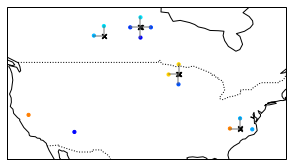

In [404]:

ind=(flux_h['lon_mean']>-130) & (flux_h['lon_mean']<-60)&(flux_h['lat_mean']>0) & (flux_h['lat_mean']<65)

fig = plt.figure(figsize=[5,5])
ax4 = fig.add_subplot(111,projection=ccrs.PlateCarree())

for i in flux_h[ind1&ind].group.unique():
    ind0 = (flux_h.loc[:,'group']==i)
    for j in ind0:
        ax4.plot([flux_h.loc[ind0,'lon_mean'],flux_h.loc[ind0,'lon_plotting']],[flux_h.loc[ind0,'lat_mean'],flux_h.loc[ind0,'lat_plotting']]
                         ,color='grey',lw=0.05)

# ax4.scatter(flux_h.loc[ind&ind_neg,'lon_plotting'], flux_h.loc[ind&ind_neg,'lat_plotting'], c=flux_h.loc[ind&ind_neg,'dif'], s=10,marker='x',cmap=mycmap)
# ax4.scatter(flux_h.loc[ind&ind_pos,'lon_plotting'], flux_h.loc[ind&ind_pos,'lat_plotting'], c=flux_h.loc[ind&ind_pos,'dif'], s=10,marker='x',cmap=mycmap)
ax4.scatter(flux_h.loc[ind,'lon_plotting'], flux_h.loc[ind,'lat_plotting'], c=flux_h.loc[ind,'dif'], s=10,marker='o',cmap=mycmap,vmax=100, vmin=-100)

ind1=(flux_h['group_num']>1)

ax4.scatter(flux_h.loc[ind&ind1,'lon_mean'], flux_h.loc[ind&ind1,'lat_mean'], s=20, marker='x',color='k')
# ax4.plot(flux_h.loc[ind&ind1,'lon_mean'], flux_h.loc[ind&ind1,'lat_mean'], s=10, marker='x',color='k')



ax4.set_extent([-125, -70, 30, 60],crs=ccrs.PlateCarree())
ax4.coastlines()
# ax4.add_feature(cfeature.LAND,facecolor='w')
# ax4.add_feature(cfeature.OCEAN)
# ax4.add_feature(cfeature.COASTLINE)
ax4.add_feature(cfeature.BORDERS, linestyle=':')
# ax4.add_feature(cfeature.LAKES, alpha=0.5)



# plt.savefig('../figure/test.pdf')

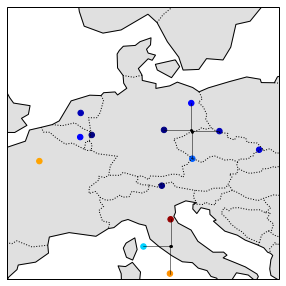

In [394]:
ind=(flux_h['lon_mean']>0) & (flux_h['lon_mean']<60)&(flux_h['lat_mean']>30) & (flux_h['lat_mean']<70)
ind1=(flux_h['group_num']>1)

fig = plt.figure(figsize=[5,5])
ax4 = fig.add_subplot(111,projection=ccrs.PlateCarree())

for i in flux_h[ind1&ind].group.unique():
    ind0 = (flux_h.loc[:,'group']==i)
    ax4.plot([flux_h.loc[ind0,'lon_mean'],flux_h.loc[ind0,'lon_plotting']],[flux_h.loc[ind0,'lat_mean'],flux_h.loc[ind0,'lat_plotting']]
                     ,color='k',lw=0.5)

ax4.scatter(flux_h.loc[ind,'lon_plotting'], flux_h.loc[ind,'lat_plotting'], c=flux_h.loc[ind,'dif'], s=30,marker='o',cmap=mycmap,vmax=100, vmin=-100)

ax4.scatter(flux_h.loc[ind1,'lon_mean'], flux_h.loc[ind1,'lat_mean'], s=10, marker='.',color='k')

ax4.set_extent([0, 20, 40, 60])
ax4.coastlines()
# ax4.add_feature(cfeature.OCEAN)
ax4.add_feature(cfeature.LAND, facecolor=[0.88,0.88,0.88]) #, 'lightgrey'
ax4.add_feature(cfeature.BORDERS, linestyle=':')


# plt.savefig('../figure/test.png',dpi=300)

array([ 3, 16, 23])

Text(0.5, 0, '$\\Delta$Cloud')

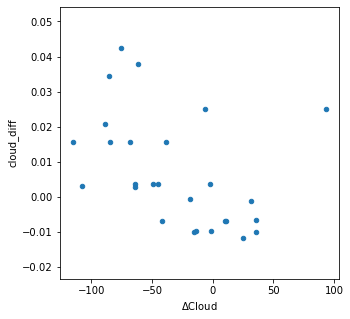

In [417]:
# For the cloud and H scatterplot
fig = plt.figure(figsize=[5,5])
ax6 = fig.add_subplot(111)
flux_h[flux_h['dif']>-150].plot.scatter(x='dif',y='cloud_diff',ax=ax6)
ax6.set_xlabel('$\Delta$H')
ax6.set_xlabel('$\Delta$Cloud')


In [208]:
offset= [-2,2]
for i flux_h.index
    if flux_h.loc[i,group_num]==1
        flux_h.loc[i,['lon_plotting','lat_plotting']]=flux_h.loc[i,['lon_mean','lat_mean']]

,pair,dif,pair_open,pair_forest,pair_open_lat,pair_open_lon,pair_forest_lat,pair_forest_lon,lat_mean,lon_mean,group,group_num
0,1,25.066,FR-Gri,FR-Fon,48.8442,1.9519,48.4764,2.7801,48.66030,2.36600,1,1
1,2,-85.293,NL-Hor,NL-Loo,52.2404,5.0713,52.1666,5.7436,52.20350,5.40745,2,1
2,3,-115.405,DE-Gri,DE-Tha,50.9495,13.5125,50.9636,13.5669,50.95655,13.53970,3,2
3,4,-68.353,DE-Kli,DE-Tha,50.8929,13.5225,50.9636,13.5669,50.92825,13.54470,3,2
4,5,-48.799,CA-NS6,CA-NS2,55.9167,-98.9644,55.9058,-98.5247,55.91125,-98.74455,5,4
5,6,-1.866,CA-NS6,CA-NS5,55.9167,-98.9644,55.8631,-98.4850,55.88990,-98.72470,5,4
6,7,-64.375,CA-NS6,CA-NS1,55.9167,-98.9644,55.8792,-98.4839,55.89795,-98.72415,5,4
7,8,-44.843,CA-NS6,CA-NS3,55.9167,-98.9644,55.9117,-98.3822,55.91420,-98.67330,5,4
8,9,-13.790,CA-SF3,CA-SF1,54.0916,-106.0053,54.4850,-105.8176,54.28830,-105.91145,9,2
9,10,-1.184,CA-SF3,CA-SF2,54.0916,-106.0053,54.2539,-105.8775,54.17275,-105.94140,9,2


In [34]:
# h_sa.HG_det.sel(lat=-10.2, lon=-61.7666, method='nearest')
h_clm.SH.sel(lat=-10.2, lon=-61.7666, method='nearest')


<xarray.DataArray 'SH' ()>
array(-5.890836)
Coordinates:
    lon      float64 -61.75
    lat      float64 -10.25

In [645]:
from matplotlib.patches import Ellipse

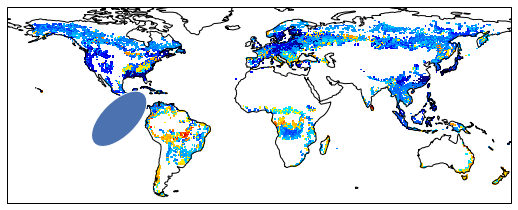

In [648]:
fig = plt.figure(figsize=(10,9))
pos1 = [0.05, 0.05, 0.70, 0.35] # [left, bottom, width, height]
ax1 = fig.add_axes(pos1, projection=ccrs.PlateCarree())
h_clm.SH.plot.pcolormesh( vmax=45,vmin=-45, 
                                transform=ccrs.PlateCarree(), 
                                cmap=mycmap, add_colorbar=False)
ax1.set_extent([-180, 180, -60, 80])
ax1.coastlines()


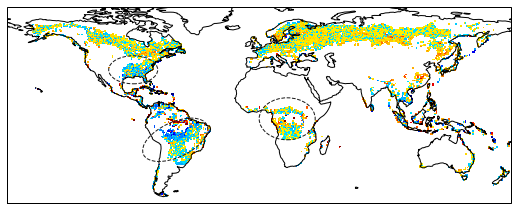

In [684]:
fig = plt.figure(figsize=(10,9))
pos1 = [0.05, 0.05, 0.70, 0.35] # [left, bottom, width, height]
ax1 = fig.add_axes(pos1, projection=ccrs.PlateCarree())
cloud05.potential.plot.pcolormesh(vmax=0.15,vmin=-0.15, 
                                transform=ccrs.PlateCarree(), 
                                cmap=mycmap, add_colorbar=False)
ax1.set_extent([-180, 180, -60, 80])
ax1.coastlines()

# Amazon
e1 = Ellipse(xy=(-60, -15),
                width=50, height=25,
                angle=25, edgecolor='k', facecolor='None',ls='--')

# southeast USA
e2 = Ellipse(xy=(-90, 35),
                width=35, height=20,
                angle=0, edgecolor='k', facecolor='None',ls='--')

# Africa
e3 = Ellipse(xy=(20, 0),
                width=40, height=30,
                angle=0, edgecolor='k', facecolor='None',ls='--')

ax1.add_artist(e1)
ax1.add_artist(e2)
ax1.add_artist(e3)


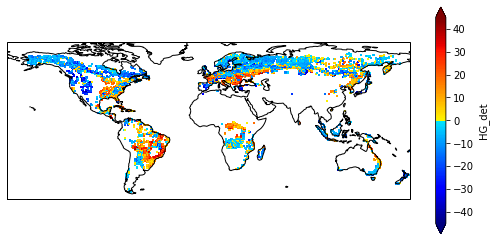

In [26]:
fig = plt.figure(figsize=(10,9))
pos1 = [0.05, 0.05, 0.70, 0.35] # [left, bottom, width, height]
ax1 = fig.add_axes(pos1, projection=ccrs.PlateCarree())
h_sa.HG_det.plot.pcolormesh( vmax=45,vmin=-45, 
                                transform=ccrs.PlateCarree(), 
                                cmap=mycmap, add_colorbar=True)
ax1.set_extent([-180, 180, -60, 80])
ax1.coastlines()


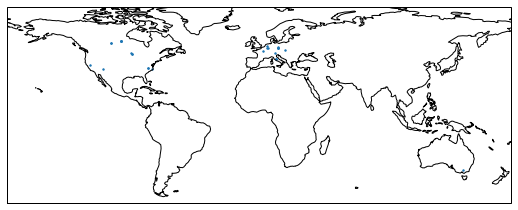

In [43]:
fig = plt.figure(figsize=(10,9))
pos1 = [0.05, 0.05, 0.70, 0.35] # [left, bottom, width, height]
ax1 = fig.add_axes(pos1, projection=ccrs.PlateCarree())

ax1.scatter(flux_h['lon_mean'], flux_h['lat_mean'], s=8,marker='.')
ax1.set_extent([-180, 180, -60, 80])
ax1.coastlines()

In [465]:
# flux_h.loc[21,'dif']=np.nan
flux_h.loc[21,'dif']=-207.3

In [38]:
ind=flux_h['dif']>-300

X = sm.add_constant(flux_h.loc[ind, 'dif'])
# model = sm.OLS(flux_h.loc[ind,'cloud_diff'], X, missing='drop')
model_rlm = sm.RLM(flux_h.loc[ind,'cloud_diffxu'], X, missing='drop')
results = model_rlm.fit()
results.predict()

array([ 0.00322918,  0.01002582,  0.01188031,  0.00898254,  0.00777827,
        0.00488783,  0.00873755,  0.00753464,  0.00562219,  0.00484582,
        0.00870515,  0.00408443,  0.00416652,  0.00735068,  0.01025486,
        0.00514107, -0.00098021,  0.01139409,  0.00941777,  0.00259145,
        0.00285023,  0.01754382,  0.00716641,  0.00996946,  0.00259822,
        0.00571167,  0.00591965,  0.00858229])

In [497]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:             cloud_diff   No. Observations:                   28
Model:                            RLM   Df Residuals:                       26
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 06 May 2020                                         
Time:                        11:23:18                                         
No. Iterations:                    21                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.003      0.365      0.715      -0.005       0.007
dif        -9.648e-05   4.44e-05     -2.174      0.030      -0.000   -9.49e-06
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [530]:
# results.predict?
flux_h.loc[:,'cloud_diff2']=-flux_h.loc[:,'cloud_diff']

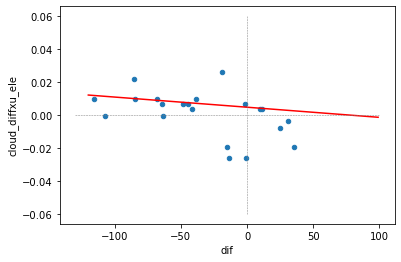

In [39]:
# sns.set()
flux_h.plot.scatter(x="dif", y="cloud_diffxu_ele")
plt.plot(np.arange(-120,100,1), results.predict(sm.add_constant(np.arange(-120,100,1))),color='r')
plt.plot([-130,100],[0,0],'--',lw=0.5,color='grey')
plt.plot([0,0],[-0.06,0.06],'--',lw=0.5,color='grey')
# plt.set_xlim([-130,100])
# ax.set_ylim([-0.06,0.06])
# ax.set_ylabel('$\Delta$Cloud', labelpad=0)
# ax.set_xlabel('$\Delta$H ($W/m^2$)')


In [90]:
results.params[1]

-6.158663998733882e-05